In [1]:
random_seed = 1
import random
random.seed(random_seed)

import numpy as np
# set the random seed to make the experiment reproducible
np.random.seed(random_seed)

import tensorflow
# set seed
tensorflow.random.set_seed(random_seed)

In [2]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
from keras.utils import np_utils

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import ADASYN

import sklearn
assert sklearn.__version__ >= "0.20"

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

## Data Preparation

### Reading in Datasets

In [3]:
X_train_df_3perc_3lag = pd.read_excel('data/model_inputs/x_train_3perc_3lag.xlsx', index_col=0)
X_test_df_3perc_3lag = pd.read_excel('data/model_inputs/x_test_3perc_3lag.xlsx', index_col=0)
y_train_df_3perc_3lag = pd.read_excel('data/model_inputs/y_train_3perc_3lag.xlsx', index_col=0)
y_test_df_3perc_3lag = pd.read_excel('data/model_inputs/y_test_3perc_3lag.xlsx', index_col=0)

In [4]:
X_train_df_5perc_3lag = pd.read_excel('data/model_inputs/x_train_5perc_3lag.xlsx', index_col=0)
X_test_df_5perc_3lag = pd.read_excel('data/model_inputs/x_test_5perc_3lag.xlsx', index_col=0)
y_train_df_5perc_3lag = pd.read_excel('data/model_inputs/y_train_5perc_3lag.xlsx', index_col=0)
y_test_df_5perc_3lag = pd.read_excel('data/model_inputs/y_test_5perc_3lag.xlsx', index_col=0)

In [5]:
X_train_df_3perc_7lag = pd.read_excel('data/model_inputs/x_train_3perc_7lag.xlsx', index_col=0)
X_test_df_3perc_7lag = pd.read_excel('data/model_inputs/x_test_3perc_7lag.xlsx', index_col=0)
y_train_df_3perc_7lag = pd.read_excel('data/model_inputs/y_train_3perc_7lag.xlsx', index_col=0)
y_test_df_3perc_7lag = pd.read_excel('data/model_inputs/y_test_3perc_7lag.xlsx', index_col=0)

In [6]:
X_train_df_5perc_7lag = pd.read_excel('data/model_inputs/x_train_5perc_7lag.xlsx', index_col=0)
X_test_df_5perc_7lag = pd.read_excel('data/model_inputs/x_test_5perc_7lag.xlsx', index_col=0)
y_train_df_5perc_7lag = pd.read_excel('data/model_inputs/y_train_5perc_7lag.xlsx', index_col=0)
y_test_df_5perc_7lag = pd.read_excel('data/model_inputs/y_test_5perc_7lag.xlsx', index_col=0)

In [7]:
X_train_standardized = pd.read_excel('data/model_inputs/X_train.xlsx', index_col=0)
X_test_standardized = pd.read_excel('data/model_inputs/X_test.xlsx', index_col=0)
y_train_standardized = pd.read_excel('data/model_inputs/y_train.xlsx', index_col=0)
y_test_standardized = pd.read_excel('data/model_inputs/y_test.xlsx', index_col=0)

In [8]:
X_train_standardized

,adj_close,reddit_pos_both,reddit_neg_both,reddit_neu_both,nyt_pos,nyt_neg,nyt_neu,quarterly_gdp_growth,monthly_cpi_growth,monthly_st_ir_growth,monthly_unemployment_growth
2016-04-01,-1.240280,0.393284,-0.098376,-0.254698,0.258980,-0.027540,-0.192837,0.631944,-0.101080,0.082686,0.017860
2016-04-04,-1.231993,-0.159879,0.972350,-0.553752,5.119592,0.809901,1.945725,0.631944,-0.101080,0.082686,0.017860
2016-04-05,-1.230976,1.201887,-0.098426,-0.921882,3.615479,0.845102,2.525844,0.631944,-0.101080,0.082686,0.017860
2016-04-06,-1.237771,1.258748,-0.763464,-0.498465,3.849877,0.919737,3.190237,0.631944,-0.101080,0.082686,0.017860
2016-04-07,-1.240625,0.276294,-0.211005,-0.072350,0.014743,0.054460,1.431607,0.631944,-0.101080,0.082686,0.017860
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2.440348,-0.357990,-0.617946,0.734099,-1.125003,-1.019085,-1.550085,1.102218,-0.115038,-0.073827,-0.304847
2021-12-28,2.506547,0.014023,-0.676437,0.467094,-1.078118,-0.770562,-1.549150,1.102218,-0.115038,-0.073827,-0.304847
2021-12-29,2.548418,-0.308494,-0.581064,0.667369,-1.040416,-0.702239,-1.542936,1.102218,-0.115038,-0.073827,-0.304847
2021-12-30,2.579788,-0.649372,-0.706349,1.036594,-1.071824,-0.699101,-1.432188,1.102218,-0.115038,-0.073827,-0.304847


In [9]:
data_dict = {
    '3perc_3lag': [X_train_df_3perc_3lag, X_test_df_3perc_3lag, y_train_df_3perc_3lag, y_test_df_3perc_3lag],
    '5perc_3lag': [X_train_df_5perc_3lag, X_test_df_5perc_3lag, y_train_df_5perc_3lag, y_test_df_5perc_3lag],
    '3perc_7lag': [X_train_df_3perc_7lag, X_test_df_3perc_7lag, y_train_df_3perc_7lag, y_test_df_3perc_7lag],
    '5perc_7lag': [X_train_df_5perc_7lag, X_test_df_5perc_7lag, y_train_df_5perc_7lag, y_test_df_5perc_7lag],
    'standardized': [X_train_standardized, X_test_standardized, y_train_standardized, y_test_standardized]
}

### Data Preprocessing
Shuffle + Convert to Numpy Array + Split Train Validation Test Set

Classes: 0 (hold), 1 (sell), 2 (buy)

In [10]:
def shuffle_numpy_encode(X_train, X_test, y_train, y_test):
    # shuffle the dataset! 
    train_data = X_train.copy(deep=True)
    train_data['decision'] = y_train['decision']

    train_data = train_data.sample(frac=1)

    X_train = train_data.drop(['decision'], axis=1)
    y_train = pd.DataFrame(train_data['decision'])
    
    # convert to numpy arrays
    X_train = np.array(X_train).astype(dtype='float64')
    X_test = np.array(X_test).astype(dtype='float64')

    y_train = np.array(y_train['decision'])
    y_test = np.array(y_test['decision'])
    
    # convert -1 (i.e., buy) to 2
    y_train = np.array(list(map(lambda x: 2 if x==-1 else x, y_train))).astype(dtype='uint8') # 2 for short
    y_test = np.array(list(map(lambda x: 2 if x==-1 else x, y_test))).astype(dtype='uint8')

    # Split Tr
    X_valid = X_train[0:400]
    X_train = X_train[400:]

    y_valid = y_train[0:400]
    y_train = y_train[400:]

    return X_train, X_valid, X_test, y_train, y_valid, y_test

### Oversampling

In [11]:
def smote(X_train, y_train):
    sm = SMOTE(sampling_strategy='not majority')
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    return X_train_oversampled, y_train_oversampled

def random_oversampler(X_train, y_train):
    oversample = RandomOverSampler(sampling_strategy='not majority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    return X_over, y_over

def adasyn(X_train, y_train):
    ada = ADASYN(sampling_strategy = 'not majority')
    X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
    return X_resampled, y_resampled

## Model

### Functions

In [12]:
def plot_curve(hist, oversampling_name):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  epochs = hist.epoch
  f, ax = plt.subplots(ncols=2, figsize=(15,5))
  f.suptitle(oversampling_name)
  ax[0].plot(epochs, hist.history['loss'], label='Training Loss')
  ax[0].plot(epochs, hist.history['val_loss'], label='Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend()
  ax[1].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
  ax[1].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

In [13]:
from tabnanny import verbose

def create_model(my_learning_rate, X_train_df):
  """Create and compile a deep neural net."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(input_shape=(X_train_df.shape[1],), units=300, activation='relu'))
  model.add(tf.keras.layers.Dense(units=100, activation='relu'))
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))    
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

  return model    


def train_model(model, train_features, train_label, epochs,
                validation_data, batch_size=None):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_data=validation_data, verbose=0)
  
  return history   

### Train Model

In [14]:
# Hyperparameters
learning_rate = 0.001
epochs = 50
batch_size = 700
validation_split = 0.2

In [15]:
results = pd.DataFrame(columns=['loss', 'accuracy', 'f1', "Predictions"])


###### 3perc_3lag ######
------ smote ------
6/6 [==============================] - 0s 1ms/step - loss: 2.1952 - accuracy: 0.4881
f1: 0.4168923980114861
predictions: {0, 1, 2}

------ random_oversampling ------
6/6 [==============================] - 0s 889us/step - loss: 2.0150 - accuracy: 0.5179
f1: 0.4567288453843076
predictions: {0, 1, 2}

------ adasyn ------
6/6 [==============================] - 0s 1ms/step - loss: 2.6783 - accuracy: 0.4821
f1: 0.3995214656822532
predictions: {0, 1, 2}


###### 5perc_3lag ######
------ smote ------
6/6 [==============================] - 0s 964us/step - loss: 4.2827 - accuracy: 0.8155
f1: 0.7325917252146761
predictions: {0}

------ random_oversampling ------
6/6 [==============================] - 0s 832us/step - loss: 4.5499 - accuracy: 0.8155
f1: 0.7325917252146761
predictions: {0}

------ adasyn ------
6/6 [==============================] - 0s 845us/step - loss: 5.1404 - accuracy: 0.8155
f1: 0.7325917252146761
predictions: {0}


###### 3perc_7l

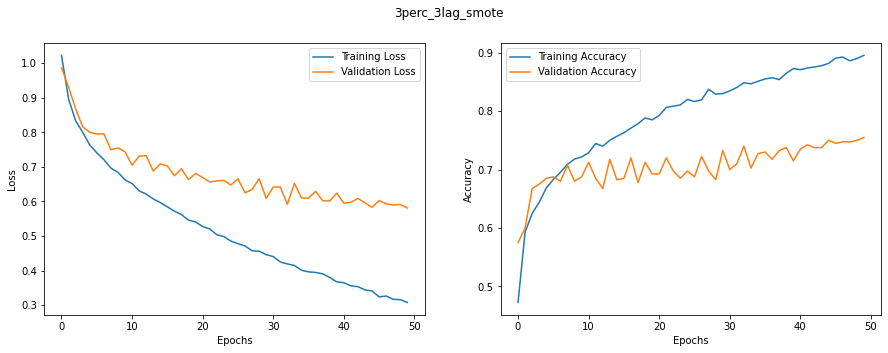

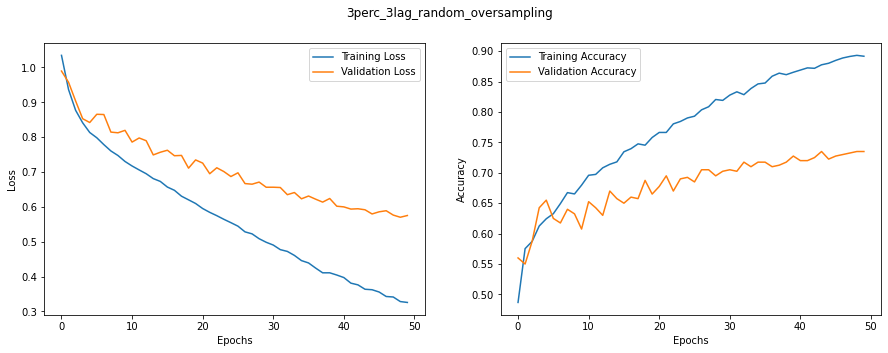

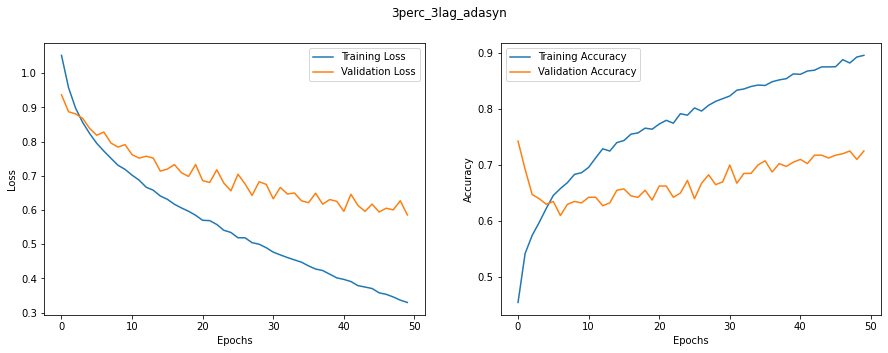

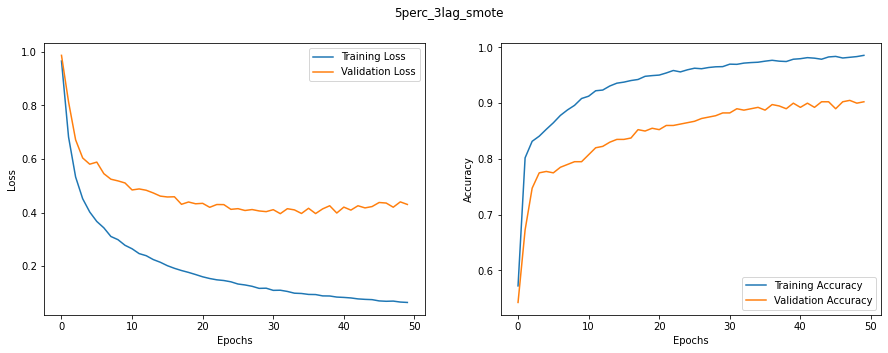

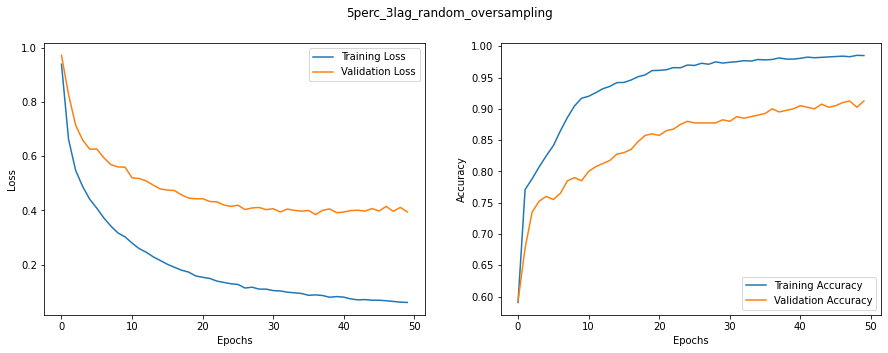

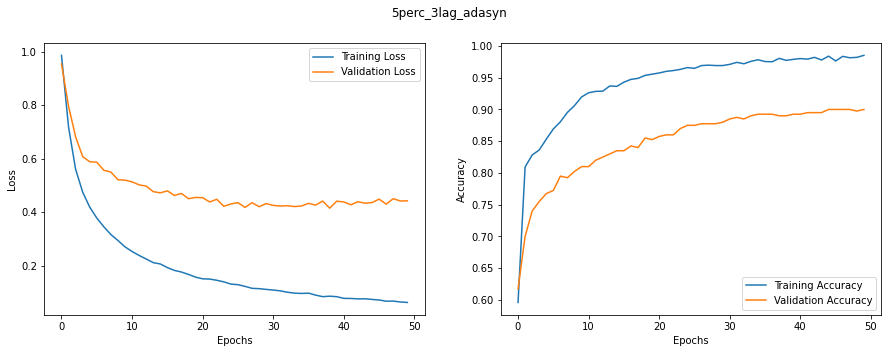

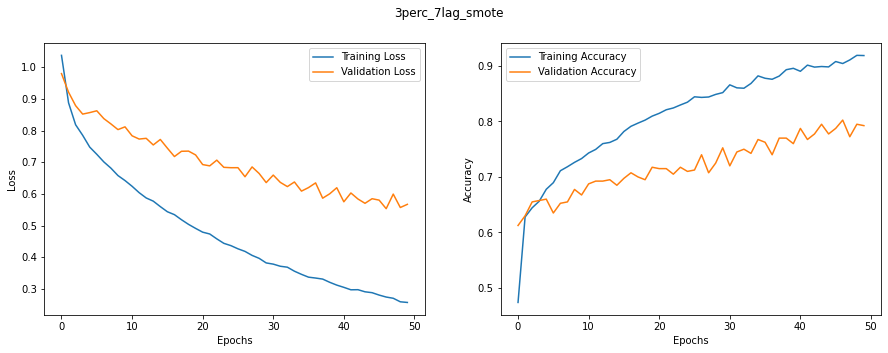

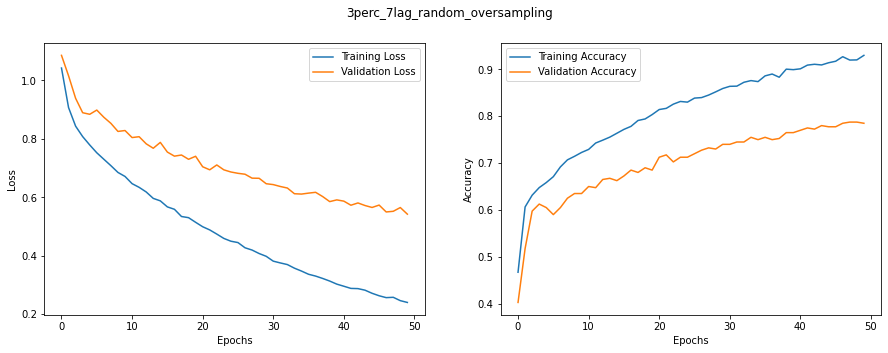

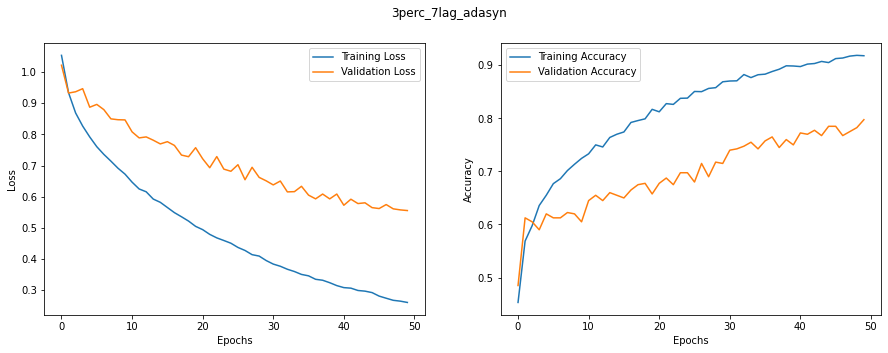

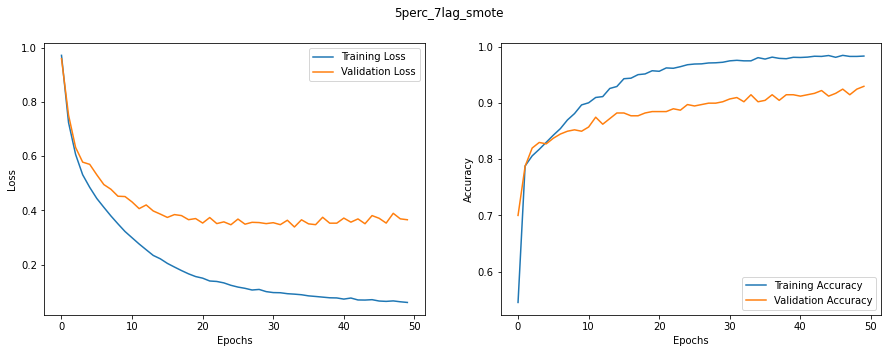

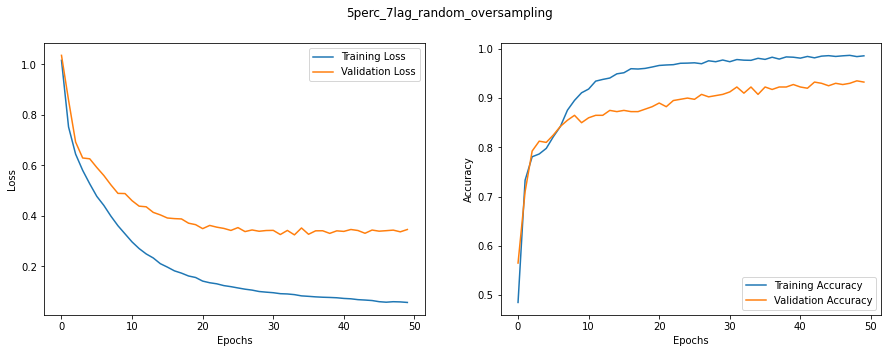

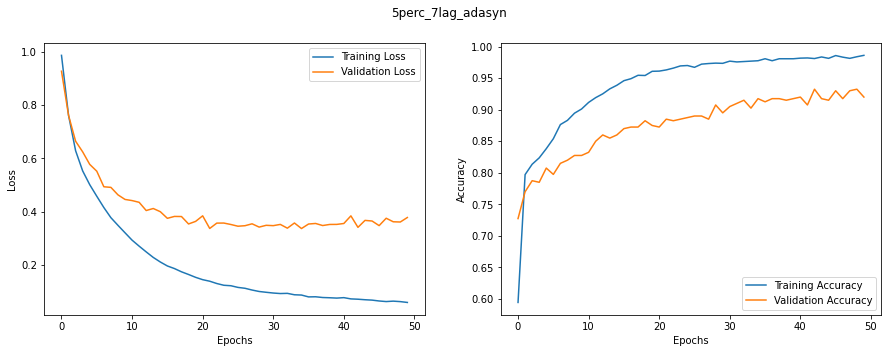

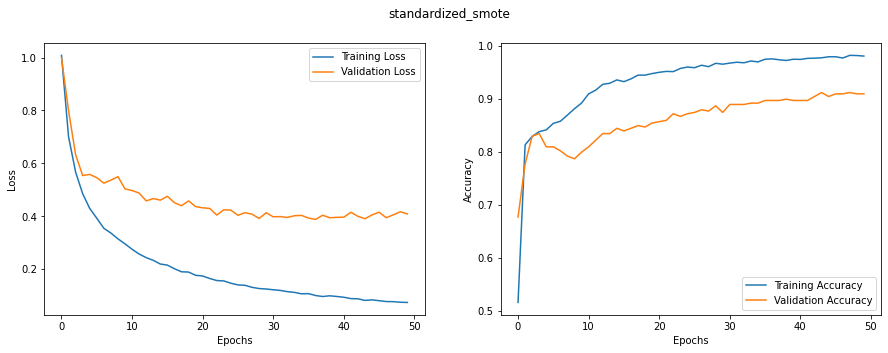

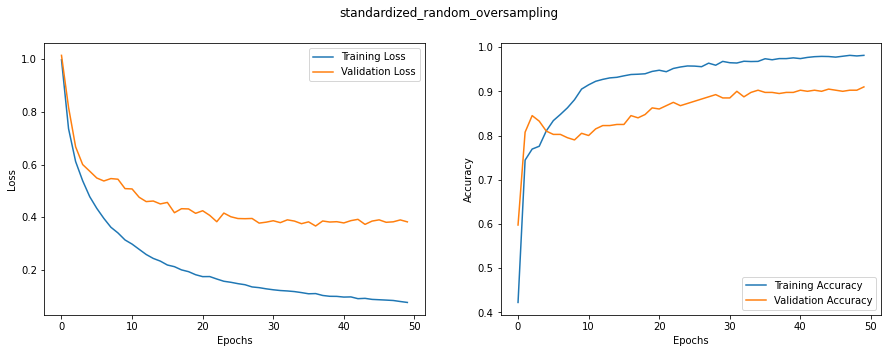

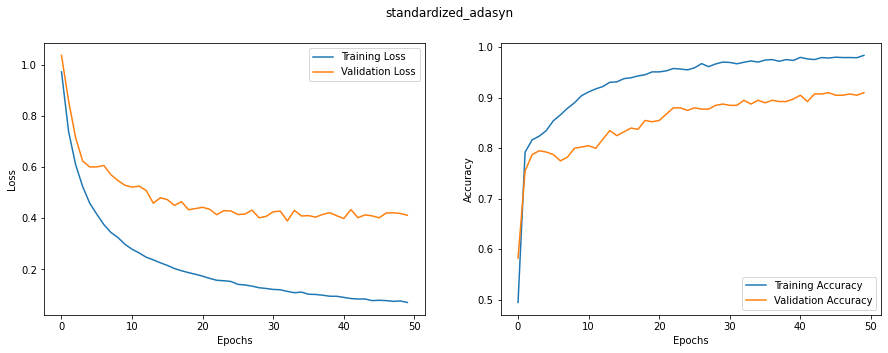

In [16]:
for (data_name, data) in data_dict.items():
    print(f'\n###### {data_name} ######')
    X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]
    X_train, X_valid, X_test, y_train, y_valid, y_test = shuffle_numpy_encode(X_train, X_test, y_train, y_test)

    # oversampling
    sm = smote(X_train, y_train)
    ro = random_oversampler(X_train, y_train)
    ada = adasyn(X_train, y_train)
    oversampling_dict = {
        'smote': sm,
        'random_oversampling': ro,
        'adasyn': ada
    }

    for (oversampling_name, data) in oversampling_dict.items():
        print(f'------ {oversampling_name} ------')
        X_train = data[0]
        y_train = data[1]

        # create model
        model = create_model(learning_rate, X_train)
        # Train the model on the normalized training set.
        hist = train_model(model, X_train, y_train, epochs, (X_valid, y_valid), batch_size)
        # Plot a graph of the metric vs. epochs.
        plot_curve(hist, data_name+'_'+oversampling_name)

        # Evaluate on Test & Save results
        predict_x=model.predict(X_test) 
        predictions=np.argmax(predict_x,axis=1)
        model_f1_score = sklearn.metrics.f1_score(y_test,predictions, average='weighted')
        results.loc[data_name+ '_' + oversampling_name] = list(model.evaluate(X_test, y_test)) + [model_f1_score, set(predictions)]
        print(f'f1: {model_f1_score}')
        print(f'predictions: {set(predictions)}\n')

In [17]:
results.sort_values(['f1'], ascending=False)

,loss,accuracy,f1,Predictions
standardized_smote,3.690049,0.821429,0.746365,"{0, 2}"
standardized_random_oversampling,2.607472,0.821429,0.746365,"{0, 2}"
5perc_3lag_smote,4.282674,0.815476,0.732592,{0}
5perc_3lag_random_oversampling,4.549881,0.815476,0.732592,{0}
5perc_3lag_adasyn,5.140392,0.815476,0.732592,{0}
5perc_7lag_smote,4.610027,0.815476,0.732592,{0}
5perc_7lag_random_oversampling,3.719633,0.815476,0.732592,{0}
5perc_7lag_adasyn,4.261268,0.815476,0.732592,{0}
standardized_adasyn,3.799580,0.815476,0.732592,{0}
3perc_3lag_random_oversampling,2.015028,0.517857,0.456729,"{0, 1, 2}"


## Tuning

### Dataset
Tune the standardized dataset (i.e., as determined by the base Logistic Regression model)

In [18]:
X_train, X_test, y_train, y_test = X_train_standardized, X_test_standardized, y_train_standardized, y_test_standardized
X_train, X_valid, X_test, y_train, y_valid, y_test = shuffle_numpy_encode(X_train, X_test, y_train, y_test)

# Doing Cross Validation
X_train_total = np.vstack([X_train, X_valid])
y_train_total = np.hstack([y_train, y_valid])

# oversampling
ro = random_oversampler(X_train, y_train)
X_train = ro[0]
y_train = ro[1]

### Tune

In [19]:
#optimisation
from bayes_opt import BayesianOptimization

# model building
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Embedding, SimpleRNN, concatenate, Lambda
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import metrics
from keras.losses import BinaryCrossentropy
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score


def tuner(C, batch_size, neurons1, neurons2, neurons3, optimizer, dropout_rate, learning_rate, epochs, layers1, layers2):

    C = round(C, 3)
    optimizerL = ['SGD', 'Adam', 'RMSprop']
    optimizerD= {'Adam':tf.keras.optimizers.Adam(learning_rate=learning_rate), 'SGD':tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  'RMSprop':tf.keras.optimizers.RMSprop(learning_rate=learning_rate)}
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    neurons1 = round(neurons1)
    neurons2 = round(neurons2)
    neurons3 = round(neurons3)
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    def create_model():
      tuned_model = tf.keras.models.Sequential()
      tuned_model.add(tf.keras.layers.Dense(input_shape=(X_train_total.shape[1],), units=neurons1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(C)))

      for i in range(layers1): #varying first set of hidden layers
        tuned_model.add(Dense(neurons2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(C)))

      tuned_model.add(Dropout(dropout_rate, seed=42))

      for i in range(layers2): #varying second set of hidden layers
          tuned_model.add(Dense(neurons3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(C)))

      # output layer
      tuned_model.add(tf.keras.layers.Dense(units=3, activation='softmax'))    
      
      tuned_model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])

      return tuned_model    

    es = EarlyStopping(monitor="loss", patience=3)

    tune_rnn = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0) 
    score = cross_val_score(tune_rnn, X_train_total, y_train_total, fit_params={'callbacks':[es]}, error_score='raise', scoring=make_scorer(f1_score, average='weighted', labels=[0,1,2])).mean() #5 fold cross validation default
    return score


In [20]:
params ={
    'neurons1': (100, 500),
    'neurons2': (100, 500),
    'neurons3': (100, 500),
    'C': (0,1),
    'optimizer':(0,2),
    'learning_rate':(0.001, 0.01),
    'batch_size':(100, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(0,3),
    'dropout_rate':(0,0.3)
}

In [21]:
# Run Bayesian Optimization
tune_results = BayesianOptimization(tuner, params, random_state=42)
# init points is the number of random parameter combinations to try default value is 5
# n_iter is the number of parameter combinations to try after initial random trials are completed. Default value is 25
tune_results.maximize(init_points=25, n_iter=50) 

|   iter    |  target   |     C     | batch_... | dropou... |  epochs   |  layers1  |  layers2  | learni... | neurons1  | neurons2  | neurons3  | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9312    | 0.3745    | 955.6     | 0.2196    | 67.89     | 1.312     | 0.468     | 0.001523  | 446.5     | 340.4     | 383.2     | 0.04117   |
| 2         | 0.9312    | 0.9699    | 849.2     | 0.0637    | 34.55     | 1.367     | 0.9127    | 0.005723  | 272.8     | 216.5     | 344.7     | 0.279     |
| 3         | 0.9312    | 0.2921    | 429.7     | 0.1368    | 82.81     | 1.399     | 1.543     | 0.006332  | 118.6     | 343.0     | 168.2     | 0.1301    |
| 4         | 0.9312    | 0.9489    | 969.1     | 0.2425    | 44.37     | 1.195     | 2.053     | 0.004961  | 148.8     | 298.1     | 113.8     | 1.819     |
| 5         | 0.9312    | 0.2588    | 696.3     | 0.

### Best Model

In [22]:
best_params = tune_results.max["params"]

In [23]:
optimizerL = ['Adam', 'SGD', 'RMSprop']
optimizerD= {'Adam':tf.keras.optimizers.Adam(learning_rate=round(best_params['learning_rate'],3)), 'SGD':tf.keras.optimizers.SGD(learning_rate=round(best_params['learning_rate'],3)),
              'RMSprop':tf.keras.optimizers.RMSprop(learning_rate=round(best_params['learning_rate'],3))}

In [24]:
# Set Random Seed
random_seed = 1
import random
random.seed(random_seed)

import numpy as np
# set the random seed to make the experiment reproducible
np.random.seed(random_seed)

import tensorflow
# set seed
tensorflow.random.set_seed(random_seed)

In [25]:
# fit model

tuned_model = tf.keras.models.Sequential()
tuned_model.add(tf.keras.layers.Dense(input_shape=(X_train.shape[1],), units=round(best_params['neurons1']), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(round(best_params['C'],3))))

for i in range(round(best_params['layers1'])): #varying first set of hidden layers
    tuned_model.add(Dense(round(best_params['neurons2']), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(round(best_params['C'], 3))))

tuned_model.add(Dropout(round(best_params['dropout_rate'],1), seed=42))

for i in range(round(best_params['layers2'])): #varying second set of hidden layers
    tuned_model.add(Dense(round(best_params['neurons3']), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(round(best_params['C'], 3))))

# output layer
tuned_model.add(tf.keras.layers.Dense(units=3, activation='softmax'))    

tuned_model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizerD[optimizerL[round(best_params['optimizer'])]], metrics=['accuracy'])

tuned_history = tuned_model.fit(X_train, y_train, epochs=400, validation_data=(X_valid, y_valid))
tuned_model.summary()

Epoch 1/400
95/95 [==============================] - 0s 2ms/step - loss: 3.8404 - accuracy: 0.5931 - val_loss: 3.9576 - val_accuracy: 0.5050
Epoch 2/400
95/95 [==============================] - 0s 1ms/step - loss: 3.6832 - accuracy: 0.6647 - val_loss: 3.8910 - val_accuracy: 0.6200
Epoch 3/400
95/95 [==============================] - 0s 1ms/step - loss: 3.5912 - accuracy: 0.6988 - val_loss: 3.8081 - val_accuracy: 0.7100
Epoch 4/400
95/95 [==============================] - 0s 1ms/step - loss: 3.5188 - accuracy: 0.7150 - val_loss: 3.7342 - val_accuracy: 0.7450
Epoch 5/400
95/95 [==============================] - 0s 1ms/step - loss: 3.4509 - accuracy: 0.7276 - val_loss: 3.6658 - val_accuracy: 0.7600
Epoch 6/400
95/95 [==============================] - 0s 1ms/step - loss: 3.3942 - accuracy: 0.7379 - val_loss: 3.5985 - val_accuracy: 0.7750
Epoch 7/400
95/95 [==============================] - 0s 931us/step - loss: 3.3402 - accuracy: 0.7406 - val_loss: 3.5413 - val_accuracy: 0.8000
Epoch 8/400

In [26]:
# model evaluation of train set
print('### Train Set ###')
tuned_model.evaluate(X_train, y_train)
predict_x_train=tuned_model.predict(X_train) 
predictions_train=np.argmax(predict_x_train,axis=1)
train_f1 = sklearn.metrics.f1_score(y_train,predictions_train, average='weighted')
train_precision = sklearn.metrics.precision_score(y_train,predictions_train, average='weighted')
train_recall = sklearn.metrics.recall_score(y_train,predictions_train, average='weighted')
print(f'precision: {train_precision}')
print(f'recall: {train_recall}')
print(f'f1: {train_f1}')
print(f'predictions: {set(predictions_train)}')

# Evaluate on Test & Save results
print('\n### Test Set ###')
predict_x=tuned_model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)
model_precision_score = sklearn.metrics.precision_score(y_test,predictions, average='weighted')
model_recall_score = sklearn.metrics.recall_score(y_test,predictions, average='weighted')
model_f1_score = sklearn.metrics.f1_score(y_test,predictions, average='weighted')
results.loc['tuned_model_standardized'] = list(tuned_model.evaluate(X_test, y_test)) + [model_f1_score, set(predictions)]

print(f'precision: {model_precision_score}')
print(f'recall: {model_recall_score}')
print(f'f1: {model_f1_score}')
print(f'predictions: {set(predictions)}')

### Train Set ###
95/95 [==============================] - 0s 675us/step - loss: 0.2934 - accuracy: 0.9735
precision: 0.9745154312524754
recall: 0.9734923790589795
f1: 0.9732044097650198
predictions: {0, 1, 2}

### Test Set ###
6/6 [==============================] - 0s 988us/step - loss: 1.0293 - accuracy: 0.8095
precision: 0.7297077922077922
recall: 0.8095238095238095
f1: 0.7399376825305418
predictions: {0, 1, 2}


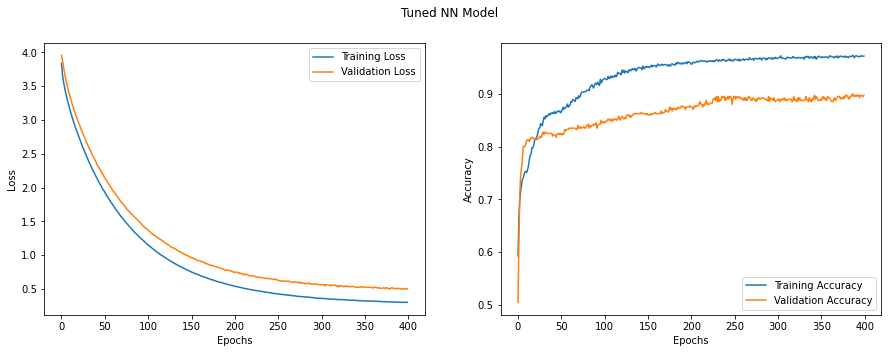

In [27]:
# Plot a graph of the metric vs. epochs.
plot_curve(tuned_history, 'Tuned NN Model')

In [28]:
results.sort_values(['f1'], ascending=False)

,loss,accuracy,f1,Predictions
standardized_smote,3.690049,0.821429,0.746365,"{0, 2}"
standardized_random_oversampling,2.607472,0.821429,0.746365,"{0, 2}"
tuned_model_standardized,1.029257,0.809524,0.739938,"{0, 1, 2}"
5perc_3lag_smote,4.282674,0.815476,0.732592,{0}
5perc_3lag_random_oversampling,4.549881,0.815476,0.732592,{0}
5perc_3lag_adasyn,5.140392,0.815476,0.732592,{0}
5perc_7lag_smote,4.610027,0.815476,0.732592,{0}
5perc_7lag_random_oversampling,3.719633,0.815476,0.732592,{0}
5perc_7lag_adasyn,4.261268,0.815476,0.732592,{0}
standardized_adasyn,3.799580,0.815476,0.732592,{0}


In [29]:
# counts of predictions on test dataset
np.unique(predictions, return_counts=True)

(array([0, 1, 2]), array([165,   1,   2]))

## Business Metrics

In [30]:
import yfinance as yf

In [31]:
whole_df_x = pd.concat([X_train_standardized, X_test_standardized])
whole_df_x.shape

(1618, 11)

In [32]:
whole_df_x = whole_df_x.reset_index()
whole_df_x['year'] = whole_df_x['index'].apply(lambda x: x.year)

In [33]:
business_metric_results = pd.DataFrame(columns=['exp_strategy_annual_return', 'exp_benchmark_annual_return', 'strategy_over_benchmark'])

for year in [2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    year_data = whole_df_x[whole_df_x['year'] == year]
    year_data = year_data.set_index('index')
    year_data = year_data.drop(['year'], axis = 1)
    predict_x=tuned_model.predict(np.array(year_data)) 
    predictions=np.argmax(predict_x,axis=1)

    df_pred = pd.DataFrame({'prediction':predictions}, index=year_data.index)
    df_pred = df_pred.replace({2:-1}) # convert classes to buy hold sell
    dates = df_pred.index

    if year == 2022:
        end_date = "2022-09-02"
    else:
        end_date = str(year+1) + "-01-01"
    df_prices = yf.download("^GSPC", start=dates[0], end=end_date)[['Adj Close']]
    df_prices = df_prices.filter(items = dates, axis=0)

    # create positions column
    positions = []
    prev = 0
    for i in range(len(df_pred)):
        positions.append(df_pred.iloc[i]['prediction'])

    df_business = pd.DataFrame()
    df_business['stock_daily_log_return'] = np.log(df_prices /df_prices.shift(1))['Adj Close']
    df_business['prediction'] = df_pred['prediction']
    df_business['position'] = positions
    df_business['benchmark'] = 1 # long and hold strategy
    df_business["strategy_Returns"] = df_business["stock_daily_log_return"] * df_business["position"].shift(1)
    df_business["benchmark_Returns"] = df_business["stock_daily_log_return"] * df_business["benchmark"].shift(1)

    # Annual Mean Returns or Expected returns
    expected_strategy_annual_return = np.exp(df_business['strategy_Returns'].mean() * 252) - 1 
    expected_benchmark_annual_return = np.exp(df_business['benchmark_Returns'].mean() * 252) - 1 
    strategy_over_benchmark = expected_strategy_annual_return-expected_benchmark_annual_return
    business_metric_results.loc[year] = [expected_strategy_annual_return, expected_benchmark_annual_return, strategy_over_benchmark]
    # print(f'Expected Annual Returns: Strategy: {round(expected_strategy_annual_return*100, 2)}%  |  Stock: {round(expected_benchmark_annual_return*100, 2)}%')

business_metric_results

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,exp_strategy_annual_return,exp_benchmark_annual_return,strategy_over_benchmark
2016,-0.017712,0.107616,-0.125327
2017,0.001251,0.185753,-0.184502
2018,-0.068161,-0.070634,0.002473
2019,-0.056730,0.288443,-0.345173
2020,0.501353,0.152929,0.348424
2021,0.015332,0.289230,-0.273898
2022,0.007855,-0.249185,0.257039
